In [ ]:
# °°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
# Proyecto final
# Redes Neuronales
# LSTM para series temporales (mensuales) del nivel de partículas PM 2.5
# Alumno: Zúñiga González Daniel Iván
# 
# °°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [104]:
df = pd.read_csv(r'C:/Users/danyp/OneDrive/Documentos/Daniel/Clase Redes Neuronales/Proyecto Redes/serie_temp_mes.csv')

In [105]:
df.head()

,pm25
0,24.058436
1,15.949403
2,18.495424
3,18.659814
4,23.352962


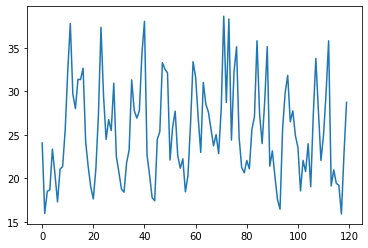

In [106]:
plt.plot(df)

In [ ]:
df = pd.read_csv(r'C:/')

In [107]:
train, test = df[:-12], df[-12:]

In [108]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [111]:
n_input = 12
n_features = 1

generator = TimeseriesGenerator(train,train,length = n_input,
                               batch_size = 6)

model = Sequential()
model.add(LSTM(200, activation='relu', input_shape= (n_input,n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')

H=model.fit_generator(generator, epochs=180)


Epoch 1/180
16/16 [==============================] - 3s 165ms/step - loss: 0.1353
Epoch 2/180
16/16 [==============================] - 1s 59ms/step - loss: 0.0592
Epoch 3/180
16/16 [==============================] - 1s 60ms/step - loss: 0.0615
Epoch 4/180
16/16 [==============================] - 1s 60ms/step - loss: 0.0582
Epoch 5/180
16/16 [==============================] - 1s 64ms/step - loss: 0.0551
Epoch 6/180
16/16 [==============================] - 1s 65ms/step - loss: 0.0538
Epoch 7/180
16/16 [==============================] - 1s 65ms/step - loss: 0.0509
Epoch 8/180
16/16 [==============================] - 1s 64ms/step - loss: 0.0492
Epoch 9/180
16/16 [==============================] - 1s 65ms/step - loss: 0.0488
Epoch 10/180
16/16 [==============================] - 1s 54ms/step - loss: 0.0543
Epoch 11/180
16/16 [==============================] - 1s 57ms/step - loss: 0.0514
Epoch 12/180
16/16 [==============================] - 1s 64ms/step - loss: 0.0448
Epoch 13/180
16/16 [====

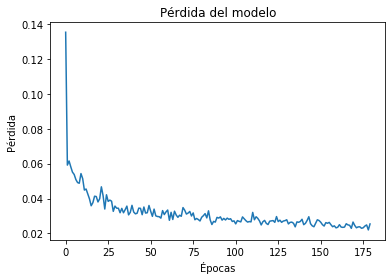

In [112]:
plt.plot(H.history['loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Épocas')
plt.show()

In [113]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:,:], [[pred_list[i]]], axis=1)

In [114]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                         index=df[-n_input:].index, columns=['Predicciones'])

df_test = pd.concat([df, df_predict], axis=1)

In [115]:
df_test.head()

,pm25,Predicciones
0,24.058436,NaN
1,15.949403,NaN
2,18.495424,NaN
3,18.659814,NaN
4,23.352962,NaN


In [116]:
df_test.tail(13)

,pm25,Predicciones
107,33.791493,NaN
108,27.773542,30.490035
109,22.046993,29.868008
110,24.953191,29.604311
111,29.781026,28.885940
112,35.814715,26.819572
113,19.110617,24.189824
114,20.957116,21.641961
115,19.409366,20.458778
116,19.193411,21.395065


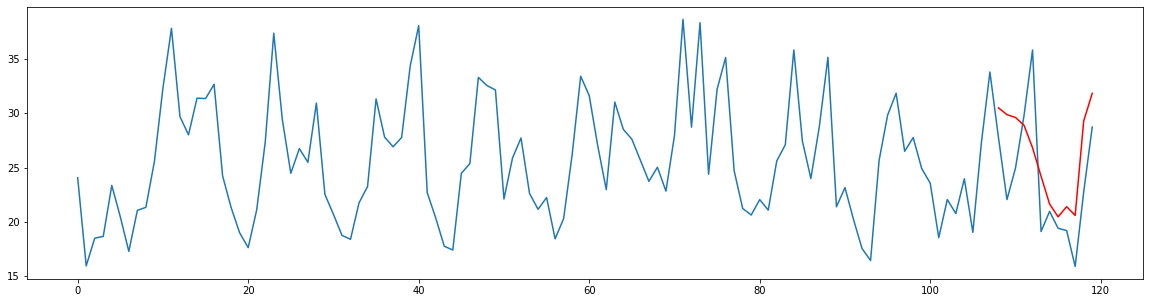

In [117]:
plt.figure(figsize=(20,5))
plt.plot(df_test.index, df_test['pm25'])
plt.plot(df_test.index, df_test['Predicciones'], color='r')
plt.show()

In [118]:
train = df

scaler.fit(train)
train = scaler.transform(train)

n_input = 12
n_features = 1

generator = TimeseriesGenerator(train,train,length = n_input,
                               batch_size = 6)

model.fit_generator(generator, epochs=180)

pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:,:], [[pred_list[i]]], axis=1)


Epoch 1/180
18/18 [==============================] - 1s 71ms/step - loss: 0.0273
Epoch 2/180
18/18 [==============================] - 1s 70ms/step - loss: 0.0254: 1s 
Epoch 3/180
18/18 [==============================] - 1s 64ms/step - loss: 0.0286
Epoch 4/180
18/18 [==============================] - 1s 64ms/step - loss: 0.0277
Epoch 5/180
18/18 [==============================] - 1s 61ms/step - loss: 0.0243
Epoch 6/180
18/18 [==============================] - 1s 63ms/step - loss: 0.0257
Epoch 7/180
18/18 [==============================] - 1s 61ms/step - loss: 0.0281
Epoch 8/180
18/18 [==============================] - 1s 62ms/step - loss: 0.0250
Epoch 9/180
18/18 [==============================] - 1s 65ms/step - loss: 0.0255
Epoch 10/180
18/18 [==============================] - 1s 64ms/step - loss: 0.0250
Epoch 11/180
18/18 [==============================] - 1s 64ms/step - loss: 0.0261
Epoch 12/180
18/18 [==============================] - 1s 66ms/step - loss: 0.0278
Epoch 13/180
18/18 [

In [119]:
add_dates = np.append(df.index[-1],np.arange(df.index[-1]+1,
                                             df.index[-1]+n_input+1,1))
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [120]:
future_dates.tail(12)

,pm25
120,NaN
121,NaN
122,NaN
123,NaN
124,NaN
125,NaN
126,NaN
127,NaN
128,NaN
129,NaN


In [121]:
 df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-12:].index,
                          columns=['Predicciones'])
df_proj = pd.concat([df,df_predict],axis=1)    


In [122]:
df_proj.tail(14)

,pm25,Predicciones
118,22.748026,NaN
119,28.728276,NaN
120,NaN,32.175655
121,NaN,28.902089
122,NaN,27.073466
123,NaN,25.921142
124,NaN,26.798115
125,NaN,30.342103
126,NaN,23.768167
127,NaN,23.614482


In [126]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                         index=future_dates[-n_input:].index,
                         columns=['Prediccion'])
df_proj = pd.concat([df,df_predict], axis=1)

In [127]:
df_proj.tail(13)

,pm25,Prediccion
119,28.728276,NaN
120,NaN,32.175655
121,NaN,28.902089
122,NaN,27.073466
123,NaN,25.921142
124,NaN,26.798115
125,NaN,30.342103
126,NaN,23.768167
127,NaN,23.614482
128,NaN,22.120511


<function matplotlib.pyplot.show(*args, **kw)>

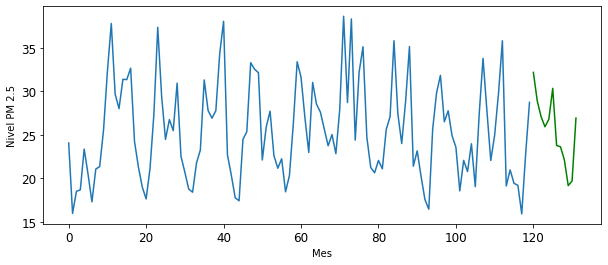

In [137]:
plt.figure(figsize=(10,4))
plt.plot(df_proj.index, df_proj['pm25'])
plt.plot(df_proj.index, df_proj['Prediccion'], color='g')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Nivel PM 2.5')
plt.xlabel('Mes')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

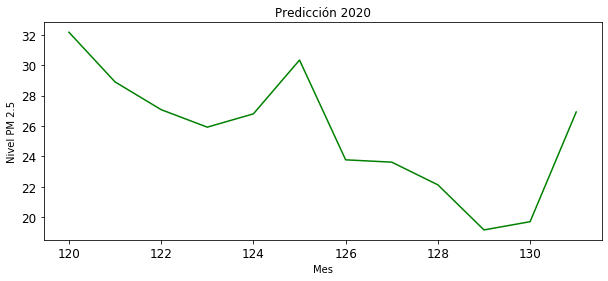

In [136]:
plt.figure(figsize=(10,4))
plt.plot(df_proj.index, df_proj['Prediccion'], color='g')
plt.title('Predicción 2020')
plt.ylabel('Nivel PM 2.5')
plt.xlabel('Mes')
plt.show